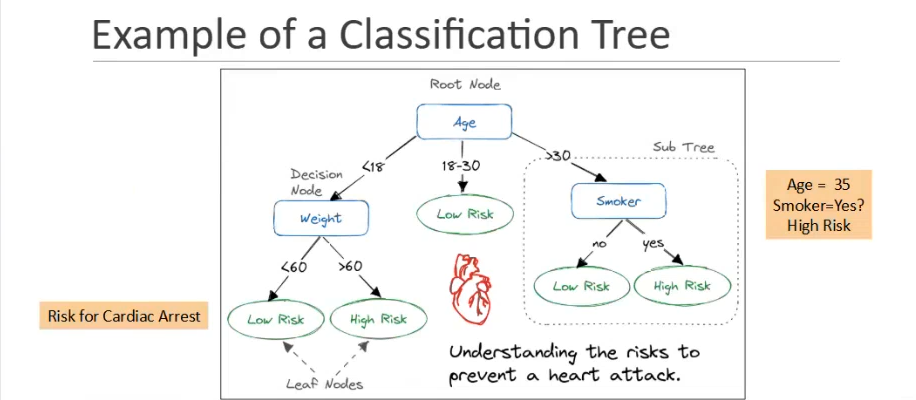

In [249]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 : Load the dataset

In [250]:
import pandas as pd
path = r"C:\Users\Saurav Mali\Downloads\BasicPython\Python Recording\python Class\MACHINE LEARNING\ML PDF AND CSV\drug200.csv"
df = pd.read_csv(path)
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


## Target feature - Drug
# Step 2 : Perform Basic Data Quality Checks

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [252]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [253]:
df.duplicated().sum()

np.int64(0)

# Step 3 - Seperate X and Y

In [254]:
X = df.drop(columns= ["Drug"])
Y = df[["Drug"]]

In [255]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [256]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


In [257]:
X.value_counts()

Age  Sex  BP      Cholesterol  Na_to_K
15   F    HIGH    NORMAL       16.725     1
     M    HIGH    NORMAL       17.206     1
          NORMAL  HIGH         9.084      1
16   F    HIGH    NORMAL       15.516     1
     M    HIGH    NORMAL       19.007     1
                                         ..
73   F    NORMAL  HIGH         19.221     1
74   F    LOW     HIGH         20.942     1
     M    HIGH    HIGH         9.567      1
                  NORMAL       15.436     1
          LOW     NORMAL       11.939     1
Name: count, Length: 200, dtype: int64

In [258]:
Y.value_counts()

Drug 
DrugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: count, dtype: int64

<Axes: xlabel='Drug'>

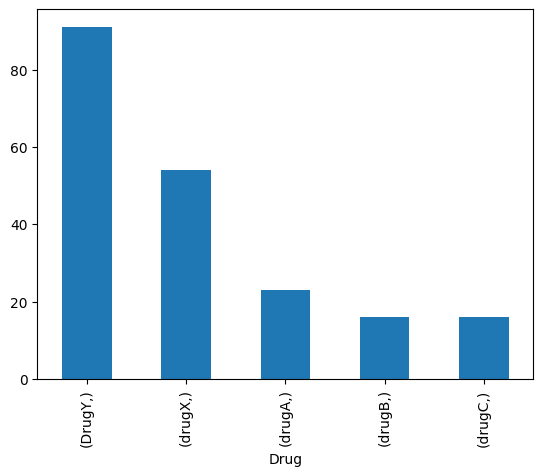

In [259]:
Y.value_counts().plot(kind="bar")

# Step 4 : Apply preprocessing on X

In [260]:
X.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
dtype: object

In [261]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [262]:
cat

['Sex', 'BP', 'Cholesterol']

In [263]:
con

['Age', 'Na_to_K']

In [264]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [265]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [266]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False)
)

In [267]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, con),
        ("cat", cat_pipe, cat)
    ]
).set_output(transform="pandas")

In [268]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [269]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.162699,-0.415145,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.988614,-1.149963,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.011034,0.271794,1.0,0.0,0.0,1.0,0.0,1.0,0.0


# Step 5 : train test split

In [270]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.4, random_state=42)

In [271]:
xtrain.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
77,-1.109805,0.426945,1.0,0.0,1.0,0.0,0.0,0.0,1.0
46,-0.443255,-0.415423,1.0,0.0,1.0,0.0,0.0,1.0,0.0
187,0.162699,-0.788452,0.0,1.0,1.0,0.0,0.0,1.0,0.0
191,-1.291591,-1.120403,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [272]:
ytrain.head()

,Drug
2,drugC
77,DrugY
46,drugA
187,drugA
191,drugA


In [273]:
xtest.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
95,-0.503851,-0.646762,0.0,1.0,0.0,1.0,0.0,0.0,1.0
15,-1.715759,-0.078892,1.0,0.0,1.0,0.0,0.0,0.0,1.0
30,-1.594568,-1.017848,1.0,0.0,0.0,0.0,1.0,0.0,1.0
158,0.889843,-0.782762,1.0,0.0,0.0,1.0,0.0,1.0,0.0
128,0.162699,2.422679,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [274]:
ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


In [275]:
xtrain.shape

(120, 9)

In [276]:
xtest.shape

(80, 9)

# Step 6 - Build the decision Tree

In [277]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=5,
    criterion="entropy"
)
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=5)

In [278]:
model.score(xtrain, ytrain)

0.725

In [279]:
model.score(xtest, ytest)

0.725

# Step 7 : hyperparameter Tuning

In [280]:
params = {
    "max_depth" : [2, 3, 4, 5, 6],
    "min_samples_split": [5, 6, 7, 8, 9, 10, 11],
    "min_samples_leaf": [3, 4, 5, 6, 7, 8, 9],
    "criterion": ["gini", "entropy"]
}

In [281]:
from sklearn.model_selection import GridSearchCV

In [282]:
base_model = DecisionTreeClassifier()

gscv = GridSearchCV(base_model, param_grid=params, cv=3, scoring="f1_macro")

gscv.fit(xtrain, ytrain)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [5, 6, 7, 8, 9, 10, 11]},
             scoring='f1_macro')

In [283]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [284]:
gscv.best_score_

np.float64(0.9365216333946984)

In [285]:
best_dtc = gscv.best_estimator_
best_dtc

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=5)

# Step 8 - Model Evaluation

In [286]:
best_dtc.score(xtrain, ytrain)

1.0

In [287]:
best_dtc.score(xtest, ytest)

1.0

# Confusion Matrix

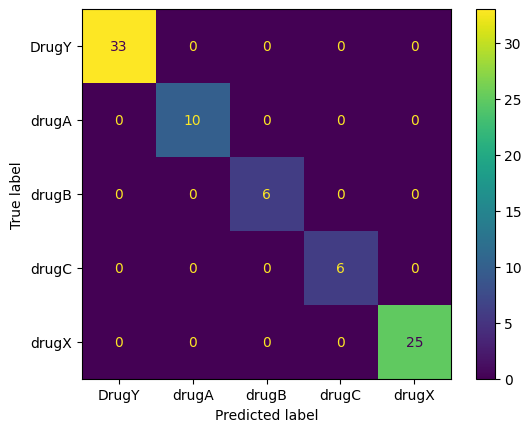

In [288]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_dtc, xtest, ytest)

In [289]:
ypred_test = best_dtc.predict(xtest)
ypred_test[0:5]

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY'], dtype=object)

In [290]:
ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


In [291]:
yprob_test = best_dtc.predict_proba(xtest)
yprob_test[0:5]

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

In [292]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        33
       drugA       1.00      1.00      1.00        10
       drugB       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        25

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



# Above model is good model because f1_macro > 0.8
# Plot the decision tree

In [293]:
# Feature names
xtrain.columns

Index(['num__Age', 'num__Na_to_K', 'cat__Sex_F', 'cat__Sex_M', 'cat__BP_HIGH',
       'cat__BP_LOW', 'cat__BP_NORMAL', 'cat__Cholesterol_HIGH',
       'cat__Cholesterol_NORMAL'],
      dtype='object')

In [294]:
# classes
best_dtc.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [295]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [296]:
ytrain.value_counts()

Drug 
DrugY    58
drugX    29
drugA    13
drugB    10
drugC    10
Name: count, dtype: int64

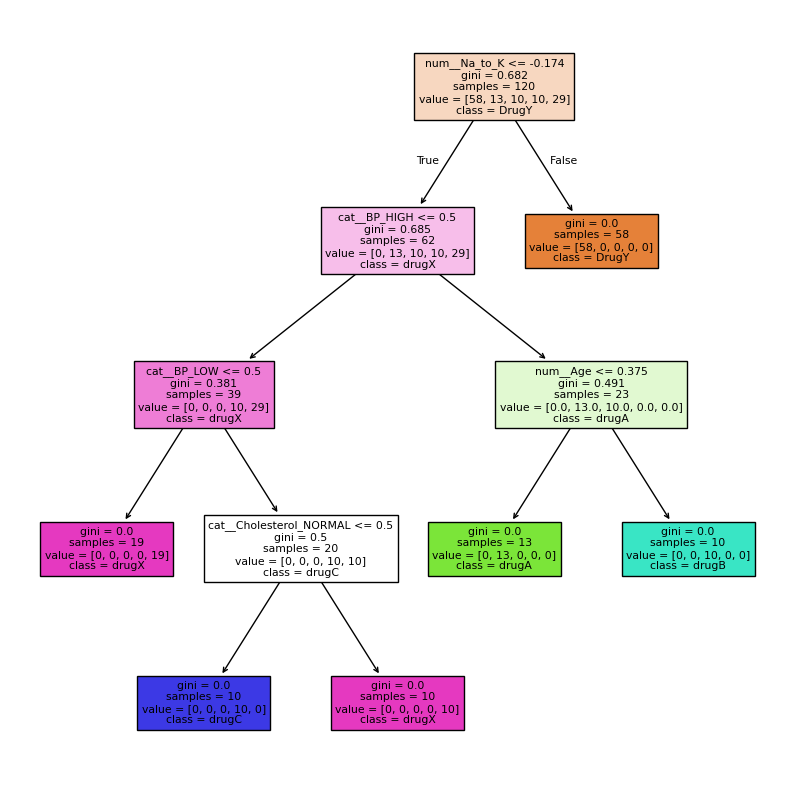

In [297]:
plt.figure(figsize=(10, 10))
plot_tree(best_dtc, feature_names=xtrain.columns, class_names=best_dtc.classes_, filled=True)
plt.show()

# Feature Importance - this is applicable only to tree based model

In [298]:
best_dtc.feature_importances_

array([0.13805432, 0.48116583, 0.        , 0.        , 0.19915809,
       0.05949678, 0.        , 0.        , 0.12212497])

In [299]:

xtrain.columns

Index(['num__Age', 'num__Na_to_K', 'cat__Sex_F', 'cat__Sex_M', 'cat__BP_HIGH',
       'cat__BP_LOW', 'cat__BP_NORMAL', 'cat__Cholesterol_HIGH',
       'cat__Cholesterol_NORMAL'],
      dtype='object')

In [300]:
imp = pd.Series(best_dtc.feature_importances_, index=xtrain.columns)
imp

num__Age                   0.138054
num__Na_to_K               0.481166
cat__Sex_F                 0.000000
cat__Sex_M                 0.000000
cat__BP_HIGH               0.199158
cat__BP_LOW                0.059497
cat__BP_NORMAL             0.000000
cat__Cholesterol_HIGH      0.000000
cat__Cholesterol_NORMAL    0.122125
dtype: float64

In [301]:
imp.sort_values(ascending=False)

num__Na_to_K               0.481166
cat__BP_HIGH               0.199158
num__Age                   0.138054
cat__Cholesterol_NORMAL    0.122125
cat__BP_LOW                0.059497
cat__Sex_M                 0.000000
cat__Sex_F                 0.000000
cat__BP_NORMAL             0.000000
cat__Cholesterol_HIGH      0.000000
dtype: float64

<Axes: >

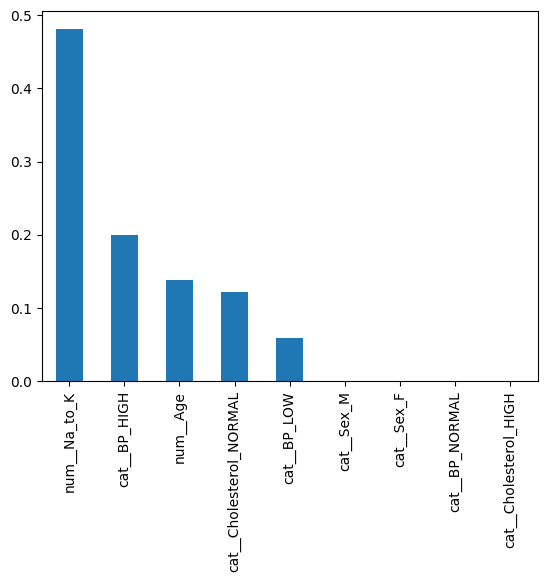

In [302]:
imp.sort_values(ascending=False).plot(kind="bar")

# Step 9 - Out of sample prediction

In [303]:
path2= r"C:\Users\Saurav Mali\Downloads\BasicPython\Python Recording\python Class\MACHINE LEARNING\ML PDF AND CSV\DrugTest.csv"
xnew = pd.read_csv(path2)
xnew.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,22.0,F,HIGH,NORMAL,22.818
1,15.0,M,HIGH,NORMAL,17.206
2,67.0,M,NORMAL,NORMAL,9.514
3,68.0,M,NaN,HIGH,11.009
4,70.0,F,NORMAL,HIGH,NaN


In [304]:
xnew.isna().sum()

Age            2
Sex            0
BP             1
Cholesterol    0
Na_to_K        3
dtype: int64

In [305]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [306]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.352186,0.934448,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.776354,0.155639,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,1.374607,-0.911824,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,1.435202,-0.704354,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,1.556393,-0.298088,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [307]:
preds = best_dtc.predict(xnew_pre)
preds[0:5]

array(['DrugY', 'DrugY', 'drugX', 'drugB', 'drugX'], dtype=object)

In [308]:
probs = best_dtc.predict_proba(xnew_pre)
probs[0:5]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [309]:
xnew["Drug"] = preds
xnew[best_dtc.classes_] = probs

In [318]:
xnew.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,DrugY,drugA,drugB,drugC,drugX
0,22.0,F,HIGH,NORMAL,22.818,DrugY,1.0,0.0,0.0,0.0,0.0
1,15.0,M,HIGH,NORMAL,17.206,DrugY,1.0,0.0,0.0,0.0,0.0
2,67.0,M,NORMAL,NORMAL,9.514,drugX,0.0,0.0,0.0,0.0,1.0
3,68.0,M,NaN,HIGH,11.009,drugB,0.0,0.0,1.0,0.0,0.0
4,70.0,F,NORMAL,HIGH,NaN,drugX,0.0,0.0,0.0,0.0,1.0


# Save the model object, preprocessor

In [311]:
%pip install joblib

In [312]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [313]:
best_dtc

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=5)

In [314]:
import joblib 

joblib.dump(pre, "DrugPre.joblib")

['DrugPre.joblib']

In [315]:
joblib.dump(best_dtc, "DrugModel.joblib")

['DrugModel.joblib']

# Load pre, model from file

In [316]:
p = joblib.load("DrugPre.joblib")
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [317]:
m = joblib.load("DrugModel.joblib")
m

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=5)